# 1. Data Preprocessing

---
## 1. Load the Dataset
 We load the dataset and display the initial shape to understand the volume of data.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("ashrae_db2.01.csv", encoding='ISO-8859-1', low_memory=False)

print(f"Initial dataset shape: {df.shape}")
print(df.head(1))

Initial dataset shape: (107583, 70)
                              Publication (Citation) Data contributor    Year  \
0  Kwok, Alison G., and Chungyoon Chun. "Thermal ...      Kwok Alison  2000.0   

   Season Koppen climate classification            Climate   City Country  \
0  Summer                           Cfa  Humid subtropical  Tokyo   Japan   

  Building type Cooling startegy_building level  ... Subject«s height (cm)  \
0     Classroom                 Air Conditioned  ...                 162.0   

  Subject«s weight (kg)  Blind (curtain) Fan  Window  Door Heater  \
0                   NaN              NaN NaN     NaN   NaN    NaN   

   Outdoor monthly air temperature (C) Outdoor monthly air temperature (F)  \
0                                 25.0                                77.0   

     Database  
0  Database 2  

[1 rows x 70 columns]


---
## 2. Feature Selection
 We filter the dataframe to keep only the specific variables identified in the documentation (Subjective, Environmental, Personal, and Contextual).

In [3]:
selected_columns = [
    # Target Variable
    'Thermal sensation',
    
    # Environmental Features
    'Air temperature (C)',
    'Relative humidity (%)',
    'Air velocity (m/s)',
    'Outdoor monthly air temperature (C)',
    'Radiant temperature (C)',
    'PMV',
    # Personal Factors
    'Met',
    'Clo',
    'Sex',
    
    # Contextual Features
    'Building type',
    'Cooling startegy_building level'
]

df_clean = df[selected_columns].copy()

# Renaming columns for readability
df_clean.columns = [
    'thermal_sensation',
    'air_temp',
    'rel_humidity',
    'air_vel',
    'outdoor_temp',
    'radiant_temp',
    'pmv',
    'met_rate',
    'clo',
    'sex',
    'building_type',
    'cooling_strategy'
]

print("Columns selected and renamed successfully.")
print(df_clean.head())

Columns selected and renamed successfully.
   thermal_sensation  air_temp  rel_humidity  air_vel  outdoor_temp  \
0               -0.5      24.2          50.2     0.06          25.0   
1               -2.1      24.2          50.2     0.06          25.0   
2                0.5      24.2          50.2     0.06          25.0   
3               -2.5      24.2          50.2     0.06          25.0   
4               -0.5      24.2          50.2     0.06          25.0   

   radiant_temp  pmv  met_rate   clo     sex building_type cooling_strategy  
0           NaN  NaN       NaN  0.25  Female     Classroom  Air Conditioned  
1           NaN  NaN       NaN  0.25  Female     Classroom  Air Conditioned  
2           NaN  NaN       NaN  0.27    Male     Classroom  Air Conditioned  
3           NaN  NaN       NaN  0.23  Female     Classroom  Air Conditioned  
4           NaN  NaN       NaN  0.34    Male     Classroom  Air Conditioned  


---
## 3. Handling missing values

In [4]:
# Drop rows where the target variable (thermal_sensation) is missing
df_clean = df_clean.dropna(subset=['thermal_sensation'])

# Define lists of numerical and categorical columns
numerical_cols = ['air_temp', 'rel_humidity', 'air_vel', 'outdoor_temp', 'met_rate', 'clo']
categorical_cols = ['sex', 'building_type', 'cooling_strategy']

# Fill missing numerical values with the median to minimize outlier impact
for col in numerical_cols:
    if col in df_clean.columns:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)

# Fill missing categorical values with 'Unknown' placeholder
for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna('Unknown')

print(f"Shape after handling missing values: {df_clean.shape}")

Shape after handling missing values: (104454, 12)


---
## 4. Encoding Categorical Variables

In [5]:
# Convert categorical variables into numeric dummy variables
df_processed = pd.get_dummies(
    df_clean,
    columns=categorical_cols,
    drop_first=True
)

print("Categorical variables encoded.")

Categorical variables encoded.


---
## 5. Normalization

In [6]:
scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])
# Display the final processed dataframe structure
print("Data Preprocessing Complete.")
print(df_processed.head())

Data Preprocessing Complete.
   thermal_sensation  air_temp  rel_humidity   air_vel  outdoor_temp  \
0               -0.5 -0.070289      0.177586 -0.273055      0.896133   
1               -2.1 -0.070289      0.177586 -0.273055      0.896133   
2                0.5 -0.070289      0.177586 -0.273055      0.896133   
3               -2.5 -0.070289      0.177586 -0.273055      0.896133   
4               -0.5 -0.070289      0.177586 -0.273055      0.896133   

   radiant_temp  pmv  met_rate       clo  sex_Male  sex_Unknown  \
0           NaN  NaN -0.023852 -1.501726     False        False   
1           NaN  NaN -0.023852 -1.501726     False        False   
2           NaN  NaN -0.023852 -1.430500      True        False   
3           NaN  NaN -0.023852 -1.572953     False        False   
4           NaN  NaN -0.023852 -1.181208      True        False   

   building_type_Multifamily housing  building_type_Office  \
0                              False                 False   
1          

# 2. Feature Selection 

---
## 1. Data preparation for new target

In [7]:
import pandas as pd
import numpy as np

features = [
    'Air temperature (C)', 'Relative humidity (%)', 'Air velocity (m/s)', 
    'Outdoor monthly air temperature (C)', 'Met', 'Clo', 
    'Sex', 'Building type', 'Cooling startegy_building level', 'PMV'
]
target_col = 'Thermal preference'

all_cols = features + [target_col] 

df_selection = df[all_cols].copy()

df_selection.columns = [
    'air_temp', 'rel_humidity', 'air_vel', 'outdoor_temp', 
    'met_rate', 'clo', 'sex', 'building_type', 'cooling_strategy', 
    'pmv',            
    'thermal_pref'    
]

df_selection = df_selection.dropna(subset=['thermal_pref'])
print("Cleaning PMV column...")
df_selection['pmv'] = pd.to_numeric(df_selection['pmv'], errors='coerce')

num_cols = ['air_temp', 'rel_humidity', 'air_vel', 'outdoor_temp', 'met_rate', 'clo', 'pmv']
for col in num_cols:
    median_val = df_selection[col].median()
    df_selection[col] = df_selection[col].fillna(median_val)
    print(f"Filled {col} with median: {median_val}")

cat_cols = ['sex', 'building_type', 'cooling_strategy']
for col in cat_cols:
    df_selection[col] = df_selection[col].fillna('Unknown')

print(f"Data ready. Shape: {df_selection.shape}")

Cleaning PMV column...
Filled air_temp with median: 23.8
Filled rel_humidity with median: 45.1
Filled air_vel with median: 0.08
Filled outdoor_temp with median: 16.0
Filled met_rate with median: 1.2
Filled clo with median: 0.64
Filled pmv with median: 0.1
Data ready. Shape: (85500, 11)


---
## 2. Encoding for Analysis

In [8]:
df_selection['temp_diff'] = df_selection['air_temp'] - df_selection['outdoor_temp']
df_selection['cooling_power'] = np.sqrt(df_selection['air_vel']) * (34 - df_selection['air_temp'])
df_selection['temp_clo_interaction'] = df_selection['air_temp'] * df_selection['clo']
df_selection['humidex_proxy'] = df_selection['air_temp'] * (df_selection['rel_humidity'] / 100)

# Normalize humidity (divide by 100) for a cleaner interaction term.
df_selection['temp_humidity'] = df_selection['air_temp'] * (df_selection['rel_humidity'] / 100)

print("New features 'temp_diff' and 'temp_humidity' created.")
print(df_selection[['air_temp', 'outdoor_temp', 'temp_diff', 'temp_humidity']].head())

New features 'temp_diff' and 'temp_humidity' created.
   air_temp  outdoor_temp  temp_diff  temp_humidity
0      24.2          25.0       -0.8        12.1484
1      24.2          25.0       -0.8        12.1484
2      24.2          25.0       -0.8        12.1484
3      24.2          25.0       -0.8        12.1484
4      24.2          25.0       -0.8        12.1484


In [9]:
from sklearn.calibration import LabelEncoder

le = LabelEncoder()
df_selection['target_encoded'] = le.fit_transform(df_selection['thermal_pref'])
y = df_selection['target_encoded']
X_raw = df_selection.drop(columns=['thermal_pref', 'target_encoded'])
cat_cols = ['sex', 'building_type', 'cooling_strategy']
X_encoded = pd.get_dummies(X_raw, columns=cat_cols, drop_first=True)

print(f"New Feature Matrix Shape: {X_encoded.shape}")
print(f"Columns included: {X_encoded.columns.tolist()}")

New Feature Matrix Shape: (85500, 23)
Columns included: ['air_temp', 'rel_humidity', 'air_vel', 'outdoor_temp', 'met_rate', 'clo', 'pmv', 'temp_diff', 'cooling_power', 'temp_clo_interaction', 'humidex_proxy', 'temp_humidity', 'sex_Male', 'sex_Unknown', 'building_type_Multifamily housing', 'building_type_Office', 'building_type_Others', 'building_type_Senior center', 'building_type_Unknown', 'cooling_strategy_Mechanically Ventilated', 'cooling_strategy_Mixed Mode', 'cooling_strategy_Naturally Ventilated', 'cooling_strategy_Unknown']


---
## 3. Correlation analysis

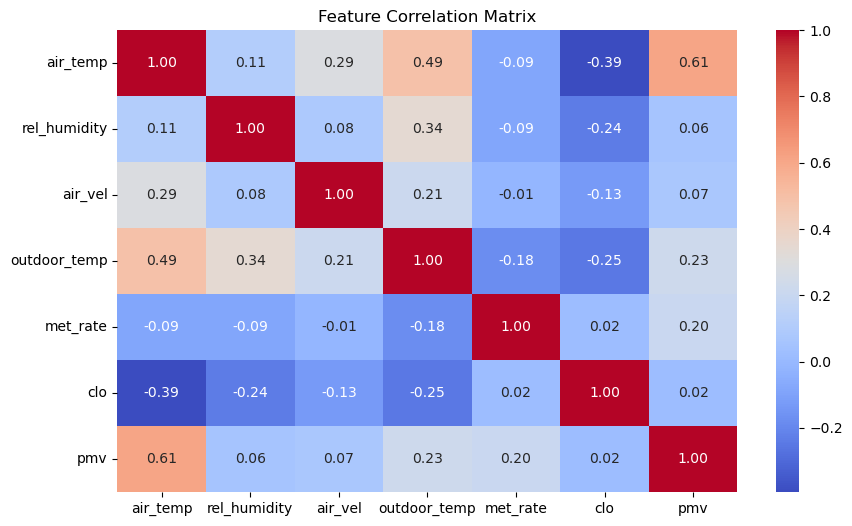

No dangerously high multicollinearity detected.


In [10]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
corr_matrix = df_selection[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.85:
            colname = corr_matrix.columns[i]
            rowname = corr_matrix.columns[j]
            high_corr_pairs.append((rowname, colname))

if high_corr_pairs:
    print(f"High correlation detected between: {high_corr_pairs}")
    print("Consider removing one of these to reduce redundancy.")
else:
    print("No dangerously high multicollinearity detected.")

---
## 4. Random Forset Feature Importance

Training model
Training Complete.


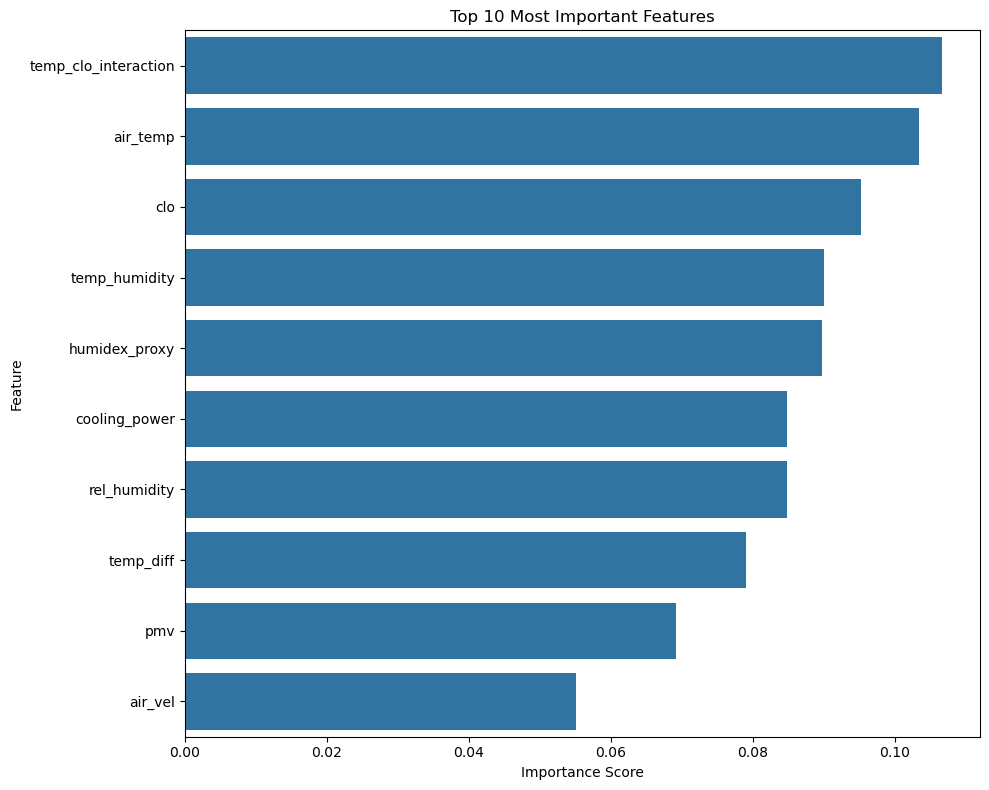

Top 5 Predictive Features:
                 Feature  Importance
9   temp_clo_interaction    0.106672
0               air_temp    0.103395
5                    clo    0.095233
11         temp_humidity    0.089970
10         humidex_proxy    0.089810


In [11]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(
    n_estimators=100,   
    random_state=10, 
    n_jobs=1           
)

print("Training model")
try:
    # Fit the model
    rf.fit(X_encoded, y)
    print("Training Complete.")

    # Get importance scores
    importances = rf.feature_importances_
    feature_names = X_encoded.columns

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)


    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
    plt.title("Top 10 Most Important Features")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    print("Top 5 Predictive Features:")
    print(feature_importance_df.head(5))

except ValueError as e:
    print("\n⚠️ CRITICAL ERROR CAUGHT:")
    print(e)
    print("\nIf the error says 'could not convert string to float', it means you MISSED the PMV cleaning step.")
    print("Go back to 'Feature Selection' and insert the 'Force PMV to Numeric' block I gave you!")

---
## 5. Final Selection

In [12]:
cumulative_threshold = 0.99

# Calculate cumulative importance
feature_importance_df['cumulative_importance'] = feature_importance_df['Importance'].cumsum()

# Select features that fall within the threshold
cutoff_index = feature_importance_df[feature_importance_df['cumulative_importance'] >= cumulative_threshold].index[0]
number_of_features = feature_importance_df.index.get_loc(cutoff_index) + 1

selected_features = feature_importance_df['Feature'].iloc[:number_of_features].tolist()

# Create the final X matrix
X_final = X_encoded[selected_features]

print(f"Cumulative Threshold: {cumulative_threshold * 100}%")
print(f"Number of features selected: {len(selected_features)}")
print(f"Features selected: {selected_features}")
print(f"Final dataset shape for training: {X_final.shape}")

Cumulative Threshold: 99.0%
Number of features selected: 18
Features selected: ['temp_clo_interaction', 'air_temp', 'clo', 'temp_humidity', 'humidex_proxy', 'cooling_power', 'rel_humidity', 'temp_diff', 'pmv', 'air_vel', 'met_rate', 'outdoor_temp', 'sex_Male', 'cooling_strategy_Naturally Ventilated', 'sex_Unknown', 'building_type_Office', 'cooling_strategy_Mixed Mode', 'building_type_Multifamily housing']
Final dataset shape for training: (85500, 18)


# 3. Predictive Modelling

---
## 1. Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X_final, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Apply SMOTE to Training Data Only
print("Original Training counts:", pd.Series(y_train).value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("New (Balanced) Training counts:", pd.Series(y_train_resampled).value_counts())

Original Training counts: target_encoded
1    34753
0    21674
2    11973
Name: count, dtype: int64
New (Balanced) Training counts: target_encoded
0    34753
2    34753
1    34753
Name: count, dtype: int64


---
## 2. Model Initialization and Training

In [14]:


rf_model_smote = RandomForestClassifier(
    n_estimators=500, 
    min_samples_split=10,
    min_samples_leaf=4,
    max_depth=None,
    bootstrap=False,
    random_state=42,
    class_weight='balanced',  # This helps the model pay more attention to minority classes 
    n_jobs=-1
)

---
## 3. Model Evaluation (Metrics)

rf_model_smote is not fitted. Fitting now on X_train_resampled / y_train_resampled...
Model Accuracy: 0.5982

Classification Report:
              precision    recall  f1-score   support

      cooler       0.61      0.60      0.60      5419
   no change       0.64      0.65      0.65      8688
      warmer       0.45      0.45      0.45      2993

    accuracy                           0.60     17100
   macro avg       0.57      0.57      0.57     17100
weighted avg       0.60      0.60      0.60     17100



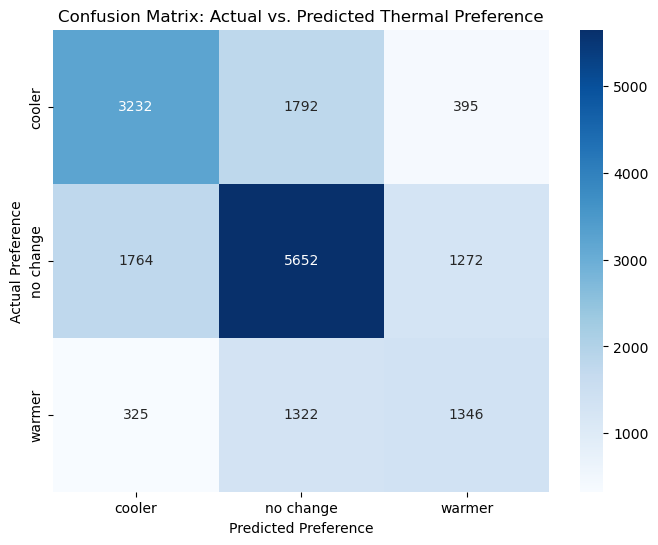

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.exceptions import NotFittedError
import seaborn as sns
import matplotlib.pyplot as plt


try:
    y_pred = rf_model_smote.predict(X_test)
except NotFittedError:
    print("rf_model_smote is not fitted. Fitting now on X_train_resampled / y_train_resampled...")
    rf_model_smote.fit(X_train_resampled, y_train_resampled)
    y_pred = rf_model_smote.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel('Predicted Preference')
plt.ylabel('Actual Preference')
plt.title('Confusion Matrix: Actual vs. Predicted Thermal Preference')
plt.show()

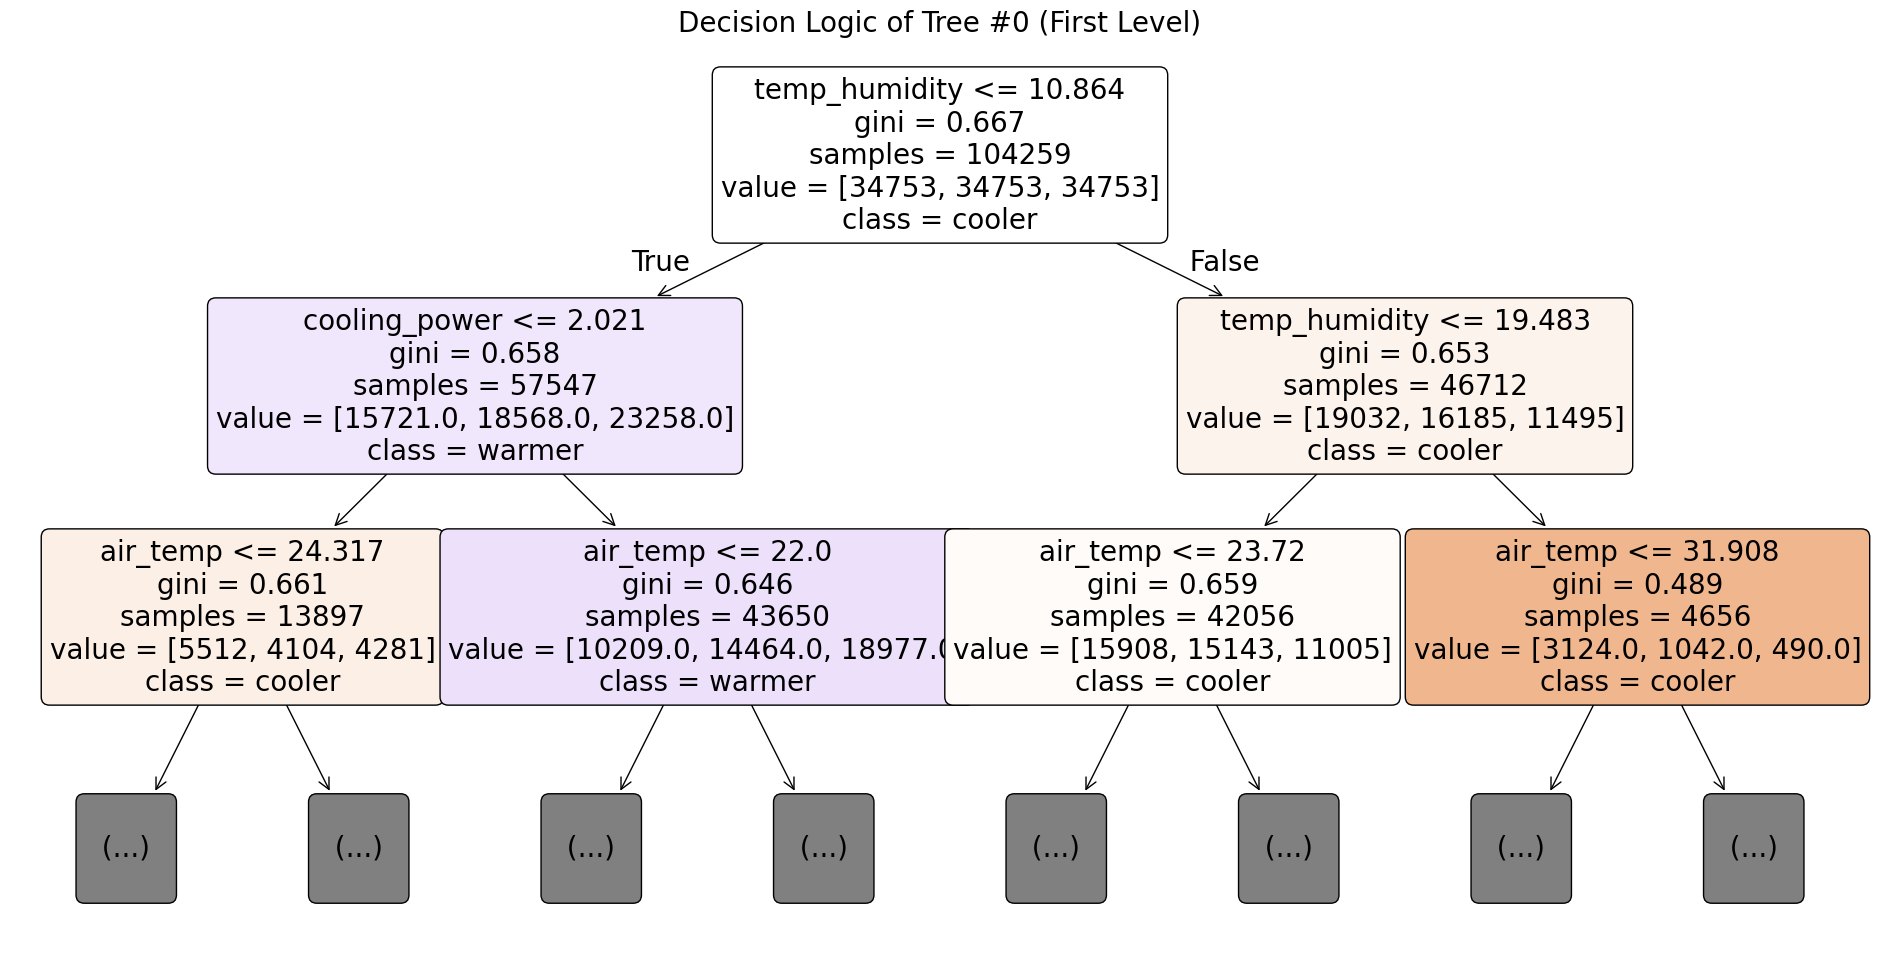

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# ---------------------------------------------------------
# VISUALIZE A SINGLE TREE
# ---------------------------------------------------------

# 1. Select a specific tree from your trained forest
# Change the index [0] to see a different tree (e.g., [10], [50])
# We assume 'best_hvac_model' is your final trained model
tree_to_plot = rf_model_smote.estimators_[0]

# 2. Create the Figure
plt.figure(figsize=(24, 12))  # Make it huge so text is legible

# 3. Plot the Tree
plot_tree(
    tree_to_plot,
    feature_names=X_train.columns,  # Label the branches with feature names
    class_names=list(le.classes_),  # Label the leaves with "Cooler", "Warmer", etc.
    filled=True,                    # Color the boxes by the majority class
    rounded=True,                   # Round the corners for a cleaner look
    max_depth=2,                    # Limit depth to 3 levels for readability
    fontsize=20                     # Adjust font size
)

plt.title("Decision Logic of Tree #0 (First Level)", fontsize=20)
plt.show()

# 4. Model Evaluation

---
## 1. Detailed Performance Metrics

In [17]:
from sklearn.metrics import classification_report, accuracy_score

# Generate predictions on the test set
y_pred = rf_model_smote.predict(X_test)

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Model Accuracy: {accuracy:.2%}")
print("-" * 30)

# Detailed report per class
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Overall Model Accuracy: 59.82%
------------------------------
Classification Report:
              precision    recall  f1-score   support

      cooler       0.61      0.60      0.60      5419
   no change       0.64      0.65      0.65      8688
      warmer       0.45      0.45      0.45      2993

    accuracy                           0.60     17100
   macro avg       0.57      0.57      0.57     17100
weighted avg       0.60      0.60      0.60     17100



---
## 3. Extracting Insights

/tmp/ipykernel_2001/3503212632.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10), palette='viridis')


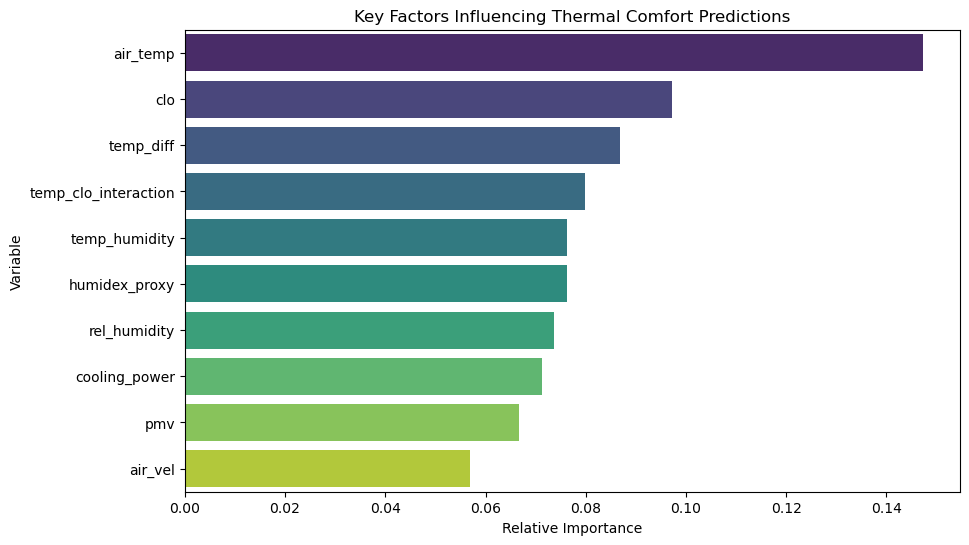

Top 5 Key Factors:
                Feature  Importance
1              air_temp    0.147296
2                   clo    0.097190
7             temp_diff    0.086758
0  temp_clo_interaction    0.079925
3         temp_humidity    0.076335


In [18]:

# Get feature importances from the trained model
importances = rf_model_smote.feature_importances_
feature_names = X_train.columns

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualize the Top 10 factors
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10), palette='viridis')
plt.title('Key Factors Influencing Thermal Comfort Predictions')
plt.xlabel('Relative Importance')
plt.ylabel('Variable')
plt.show()

print("Top 5 Key Factors:")
print(feature_imp_df.head(5))

---
## 4. Robustness Check

In [19]:
from sklearn.model_selection import cross_val_score

print("Running Cross-Validation (5-fold)...")
cv_scores = cross_val_score(rf_model_smote, X_final, y, cv=5, scoring='accuracy', n_jobs=-1)

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2%} (+/- {cv_scores.std() * 2:.2%})")

Running Cross-Validation (5-fold)...
Cross-Validation Accuracy Scores: [0.4422807  0.32830409 0.3780117  0.50672515 0.51532164]
Mean Accuracy: 43.41% (+/- 14.50%)


## 5. ROC Curve, Precision-Recall Curve and Bias Check

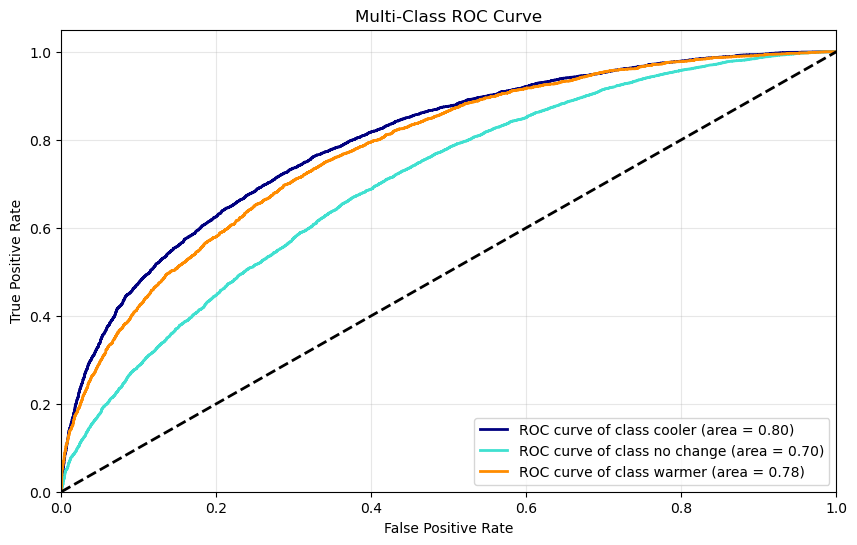

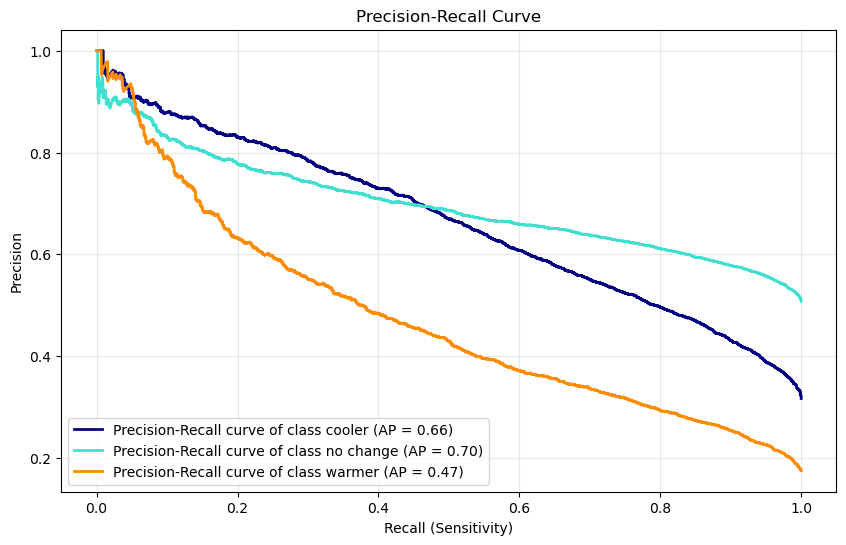

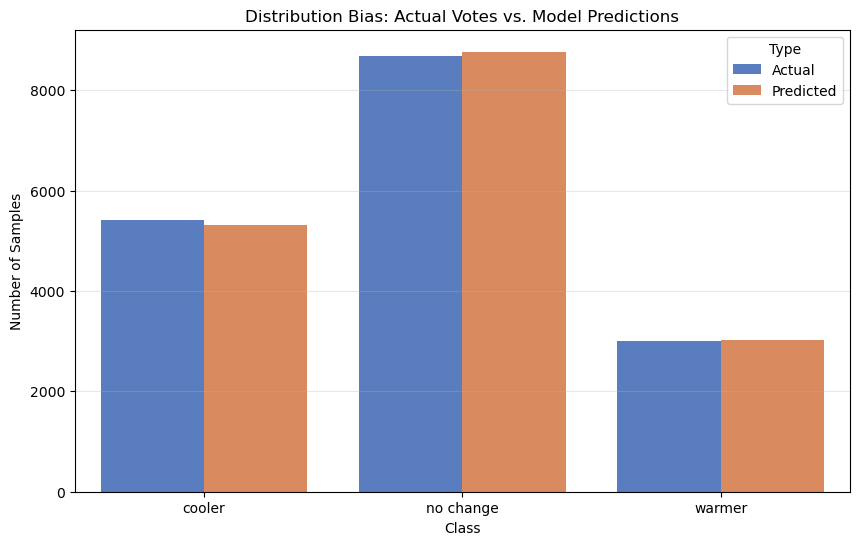

In [20]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

classes = [0, 1, 2] # 0=Cooler, 1=No Change, 2=Warmer
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Get the probabilities (confidence scores) from the model
y_score = rf_model_smote.predict_proba(X_test)

class_names = le.classes_ 
colors = cycle(['navy', 'turquoise', 'darkorange'])

plt.figure(figsize=(10, 6))

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))

for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label='Precision-Recall curve of class {0} (AP = {1:0.2f})'
             ''.format(class_names[i], avg_precision))

plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()


plt.figure(figsize=(10, 6))

# Prepare data for plotting
y_pred_final = rf_model_smote.predict(X_test)
unique, counts_actual = np.unique(y_test, return_counts=True)
unique_p, counts_pred = np.unique(y_pred_final, return_counts=True)

dist_df = pd.DataFrame({
    'Class': list(class_names) * 2,
    'Count': list(counts_actual) + list(counts_pred),
    'Type': ['Actual'] * len(counts_actual) + ['Predicted'] * len(counts_pred)
})

sns.barplot(x='Class', y='Count', hue='Type', data=dist_df, palette='muted')
plt.title('Distribution Bias: Actual Votes vs. Model Predictions')
plt.ylabel('Number of Samples')
plt.grid(axis='y', alpha=0.3)
plt.show()

---
# Grid-Search
This was used to find the best parameters for the RFE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score


param_grid = {
    'n_estimators': [300, 500],        
    'min_samples_split': [10, 16, 20], 
    'min_samples_leaf': [4, 8, 12],    
    'max_depth': [None, 20, 30],       
    'bootstrap': [False],              
    'class_weight': ['balanced', 'balanced_subsample'] 
}

scorer = 'f1_macro' 

grid_search_hvac = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=1),
    param_grid=param_grid,
    cv=3,                 
    verbose=2,            
    n_jobs=1,             
    scoring=scorer        
)

print("Starting Grid Search for HVAC System... (This may take 5-10 mins)")
grid_search_hvac.fit(X_train_resampled, y_train_resampled)
print("\n" + "="*40)
print(f"Best Parameters Found: {grid_search_hvac.best_params_}")
print(f"Best Cross-Validation Score ({scorer}): {grid_search_hvac.best_score_:.4f}")
print("="*40)

best_hvac_model = grid_search_hvac.best_estimator_

Starting Grid Search for HVAC System... (This may take 5-10 mins)
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 1.3min
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 1.2min
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 1.2min
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time= 2.2min
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time= 2.1min
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time= 1.9min
[CV] EN

---
# Plots
Used in the Documentation or presentation

/tmp/ipykernel_47492/1892014843.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


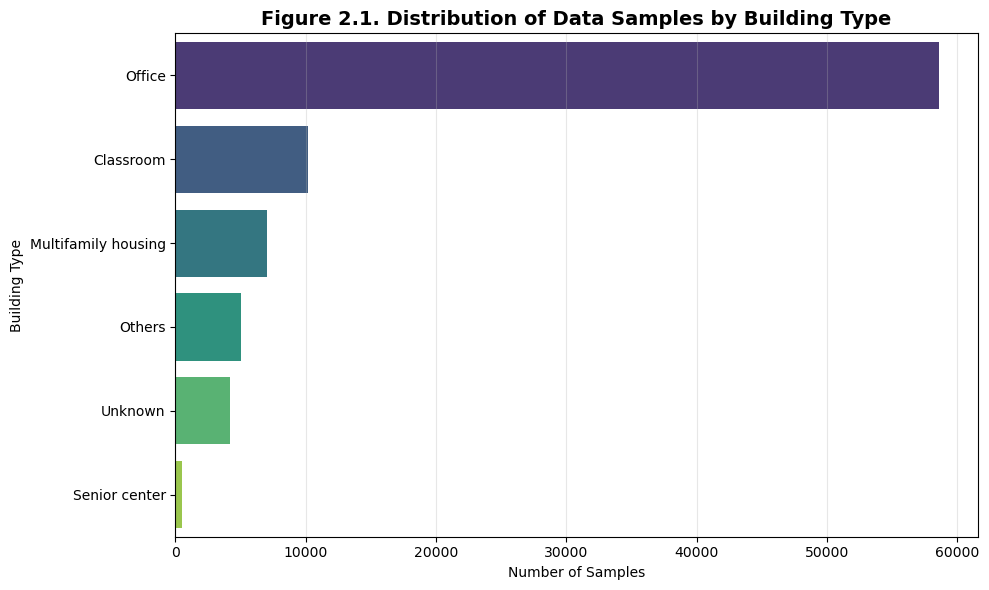

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

order_types = df_selection['building_type'].value_counts().index

sns.countplot(
    y='building_type', 
    data=df_selection, 
    order=order_types, 
    palette='viridis'
)

plt.title('Figure 2.1. Distribution of Data Samples by Building Type', fontsize=14, weight='bold')
plt.xlabel('Number of Samples')
plt.ylabel('Building Type')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

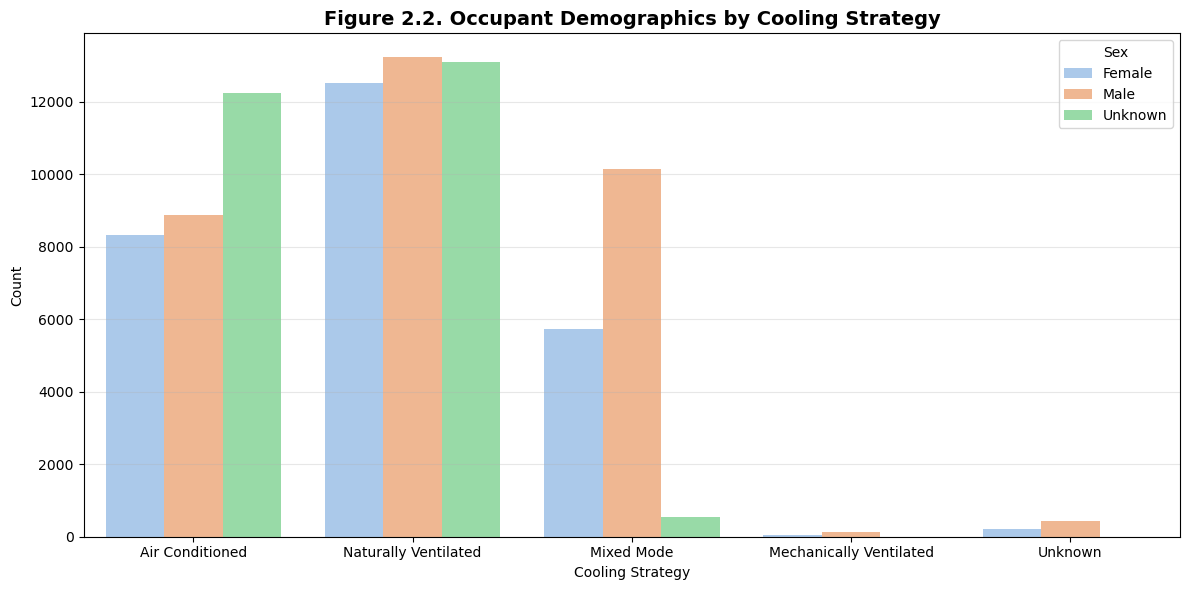

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(
    x='cooling_strategy', 
    hue='sex', 
    data=df_selection, 
    palette='pastel'
)

plt.title('Figure 2.2. Occupant Demographics by Cooling Strategy', fontsize=14, weight='bold')
plt.xlabel('Cooling Strategy')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_47492/893020992.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


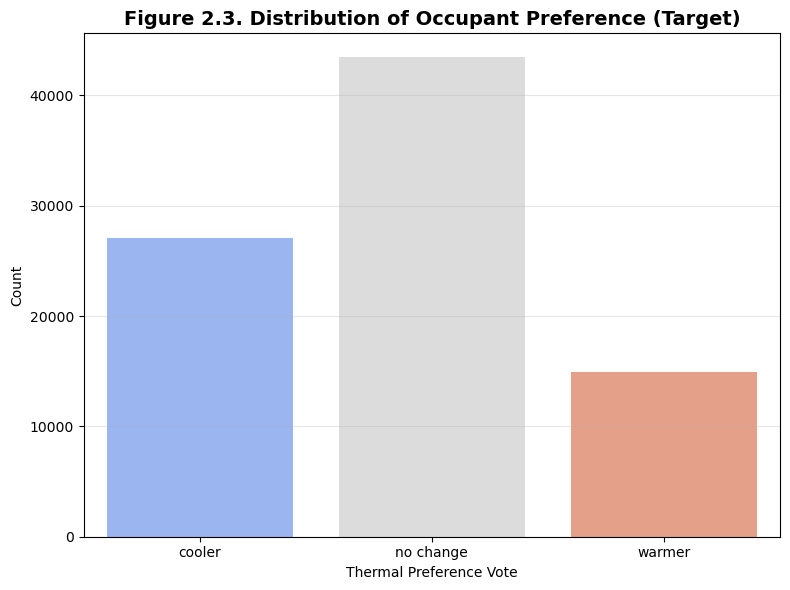

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(
    x='thermal_pref', 
    data=df_selection, 
    palette='coolwarm', 
    order=['cooler', 'no change', 'warmer']
)

plt.title('Figure 2.3. Distribution of Occupant Preference (Target)', fontsize=14, weight='bold')
plt.xlabel('Thermal Preference Vote')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

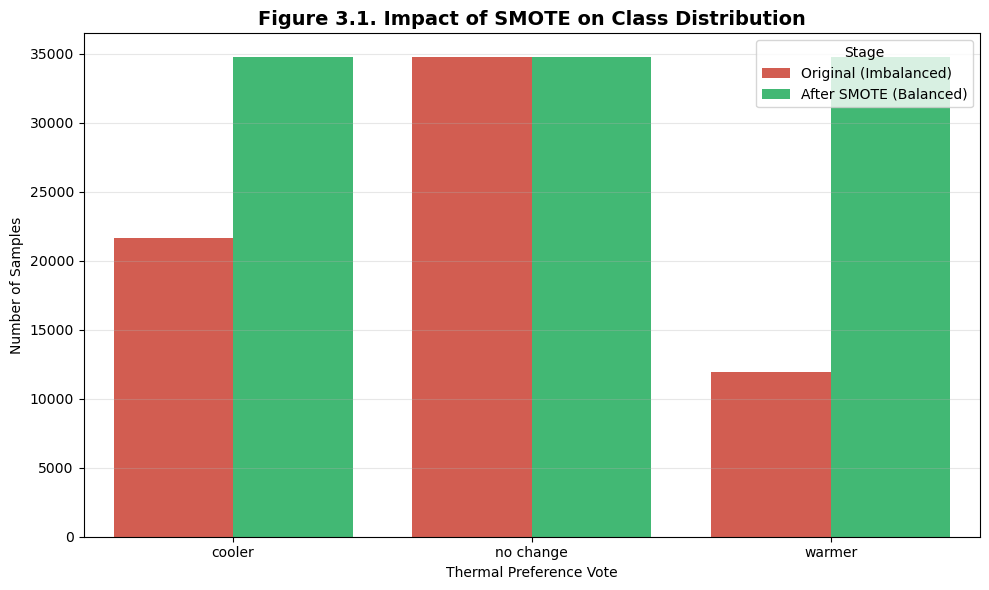

In [ ]:
import pandas as pd
import numpy as np

unique_orig, counts_orig = np.unique(y_train, return_counts=True)
unique_resamp, counts_resamp = np.unique(y_train_resampled, return_counts=True)

df_smote_viz = pd.DataFrame({
    'Class': list(le.classes_) * 2,
    'Count': list(counts_orig) + list(counts_resamp),
    'Stage': ['Original (Imbalanced)'] * len(counts_orig) + ['After SMOTE (Balanced)'] * len(counts_resamp)
})

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Class', 
    y='Count', 
    hue='Stage', 
    data=df_smote_viz, 
    palette=['#e74c3c', '#2ecc71']
)

plt.title('Figure 3.1. Impact of SMOTE on Class Distribution', fontsize=14, weight='bold')
plt.xlabel('Thermal Preference Vote')
plt.ylabel('Number of Samples')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_47492/2183142116.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


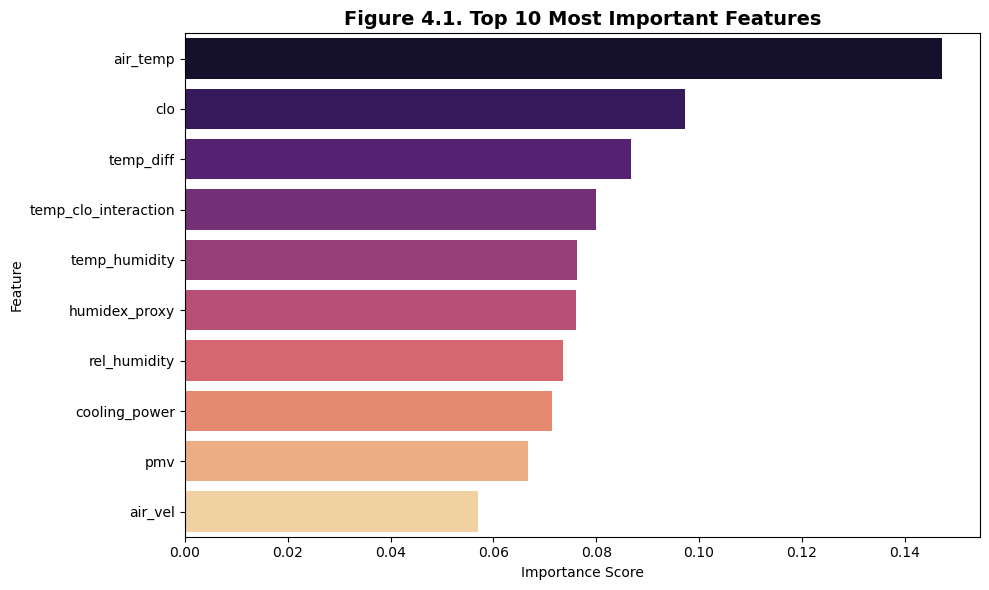

In [ ]:
importances = rf_model_smote.feature_importances_
feature_names = X_train.columns

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_imp_df.head(10), 
    palette='magma'
)

plt.title('Figure 4.1. Top 10 Most Important Features', fontsize=14, weight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

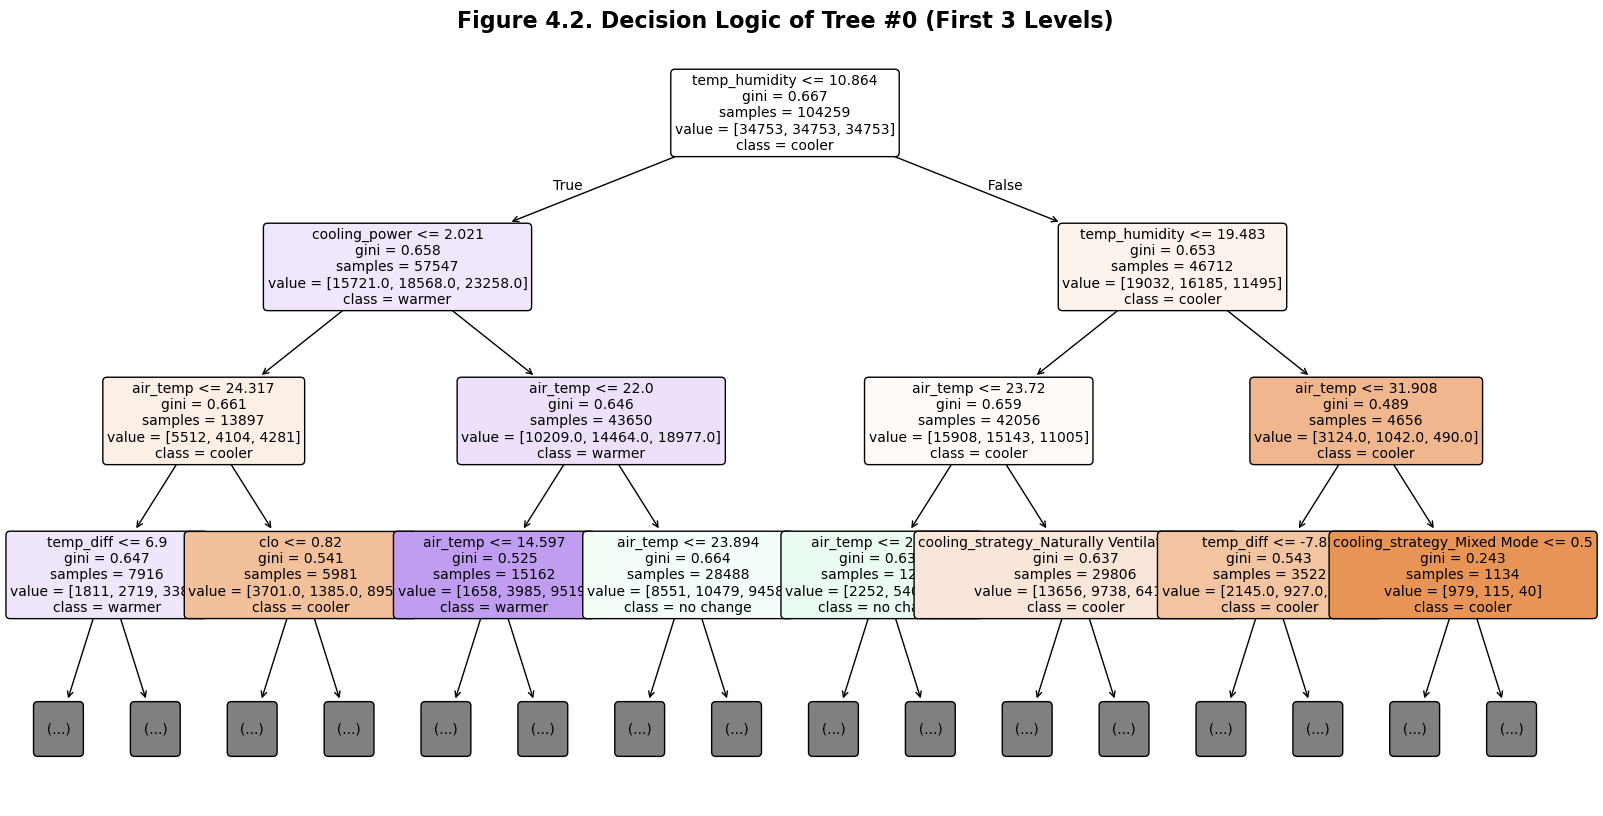

In [ ]:
from sklearn.tree import plot_tree

tree_to_plot = rf_model_smote.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree_to_plot,
    feature_names=X_train.columns,
    class_names=list(le.classes_),
    filled=True,
    rounded=True,
    max_depth=3,   
    fontsize=10
)

plt.title('Figure 4.2. Decision Logic of Tree #0 (First 3 Levels)', fontsize=16, weight='bold')
plt.show()

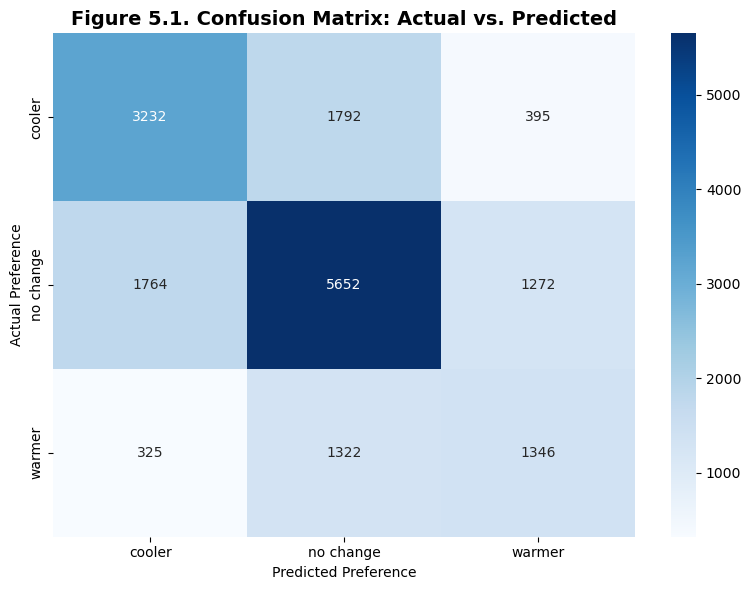

In [30]:
from sklearn.metrics import confusion_matrix

y_pred = rf_model_smote.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=le.classes_, 
    yticklabels=le.classes_
)

plt.title('Figure 5.1. Confusion Matrix: Actual vs. Predicted', fontsize=14, weight='bold')
plt.xlabel('Predicted Preference')
plt.ylabel('Actual Preference')
plt.tight_layout()
plt.show()

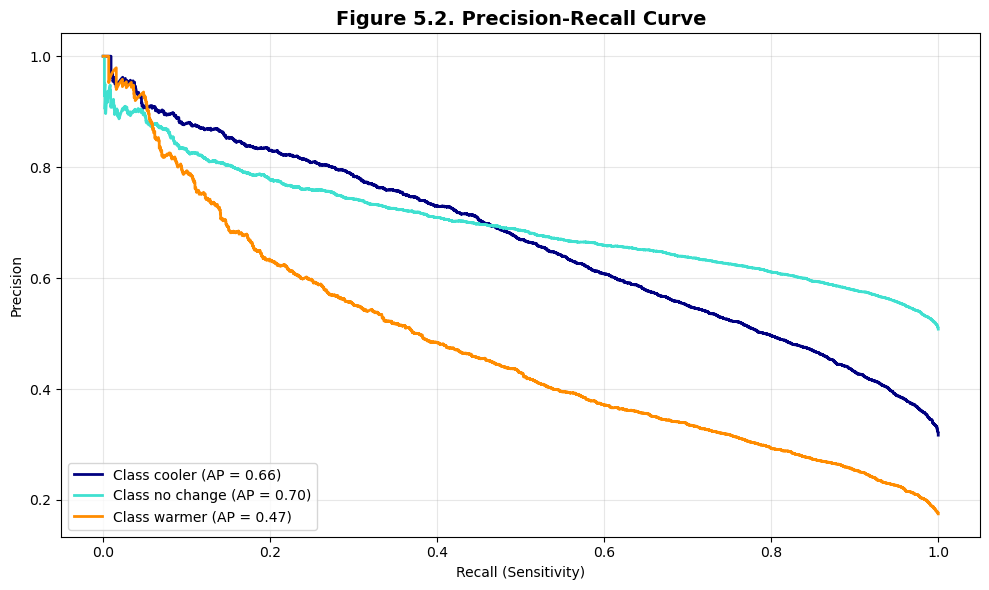

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = rf_model_smote.predict_proba(X_test)
colors = cycle(['navy', 'turquoise', 'darkorange'])
class_names = le.classes_

plt.figure(figsize=(10, 6))

for i, color in zip(range(3), colors):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])
    
    plt.plot(
        recall, precision, color=color, lw=2,
        label=f'Class {class_names[i]} (AP = {avg_precision:0.2f})'
    )

plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Figure 5.2. Precision-Recall Curve', fontsize=14, weight='bold')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()